In [9]:
import numpy as np
import pandas as pd
import zipfile
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage import data, exposure
from skimage.transform import rescale, resize

import warnings
warnings.filterwarnings("ignore")

In [52]:
data_set = "dogs-vs-cats"

with zipfile.ZipFile("C:\\Users\\Arshad\\AppData\\Local\\Temp\\806d1ce3-9446-4c25-91ad-43332848b027_dogs-vs-cats.zip.027\\train.zip", "r") as z:
    z.extractall(".")

    destination = '/kaggle/files/images'
    z.extractall(destination)

In [54]:
data_ = pd.DataFrame({'file': os.listdir('/kaggle/files/images/train')})
print(data_.head())

           file
0     cat.0.jpg
1     cat.1.jpg
2    cat.10.jpg
3   cat.100.jpg
4  cat.1000.jpg


In [48]:
Y=[]
for i in os.listdir('/kaggle/files/images/train'):
    if 'dog' in i:
        Y.append(1)
    else:
        Y.append(0)


data_['class'] = Y
print(data_.head())

           file  class
0     cat.0.jpg      0
1     cat.1.jpg      0
2    cat.10.jpg      0
3   cat.100.jpg      0
4  cat.1000.jpg      0


In [31]:
file = data_['file']

Y = data_['class']

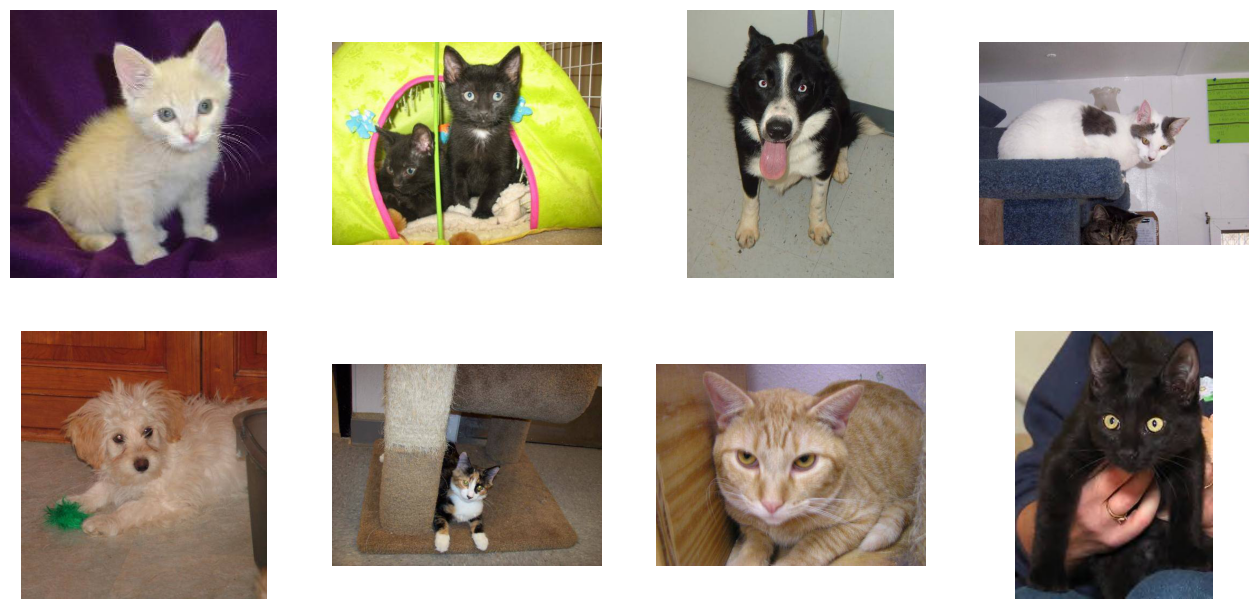

In [24]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(16,16))

images = os.listdir('/kaggle/files/images/train')
for i in range(8):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    fig.axis('off')
    img = mpimg.imread(os.path.join('/kaggle/files/images/train', img))
    fig.imshow(img)

In [25]:
data_size = 1200
ptr=0
X = []
for i in file:
    img = mpimg.imread('/kaggle/files/images/train/' + i)
    resized_img = resize(img , (128 , 64))
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    X.append(fd)
    ptr = ptr+1+
    if(ptr >= data_size):
        break

In [26]:
Y = Y[:data_size]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [ ]:
from sklearn.svm import LinearSVC
c=1
svm_LinearSVC = LinearSVC(C=c).fit(X_train, y_train)
accuracy = svm_LinearSVC.score(X_test, y_test)
print('SVC Linear Accuracy: ' + str(accuracy))

In [ ]:
from sklearn.svm import SVC
svm_svc = SVC(kernel='linear', C=c).fit(X_train, y_train)
accuracy = svm_svc.score(X_test, y_test)
print('Svm-Svc Accuracy: ' + str(accuracy))